<h1>Linear Regression</h1>

A Statistical Method used to model the relationship between a dependent variable (also called target variable) and one or more independent variable (features).

The goal is to find the best-fitting straight line (linear relationship) through the data points that can predict the dependent variable based on independent variables.

<h2>Simple Linear Regression</h2>

There is only one independent variable. The relationship between the dependent variable y and the independent variable x is modeled by the equation:

y = b0 + b1 * x + E

* b0 is the intercept of the regression line (the value of y when x = 0)
* B1 is the slope of the regression line (the change in y for the one unit change in x)
* E is the error term (the difference between observed and predicted values.)

Code :

<h3>Import Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

<h3>Import CSV</h3>

In [2]:
df = pd.read_csv('data/Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<h3>Describe</h3>

In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


<h3>Data Preprocessing</h3>

In [7]:
# Assigning X and Y
x = df.iloc[:,:-1].values # iloc and loc[:,'column']: means to select all rows
y = df.iloc[:,1].values

In [18]:
# Using Loc
x = df.loc[:,'YearsExperience'].values
y = df.loc[:,'Salary'].values

x = x.reshape(-1,1) # Reshape the data to 2D array
print(x,y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


<h3>Split Dataset</h3>

In [19]:
# Stratify IMP concept
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11)

print(x_train.shape)
print(x_test.shape)

(24, 1)
(6, 1)


<h3>Linear Regression</h3>

In [20]:
regression = LinearRegression()

In [21]:
model = regression.fit(x_train,y_train)

<h3>Get Coefficient and Intercept</h3>

y = coef_ * x + intercept_

In [22]:
print(model.coef_)
print(model.intercept_)

[9504.98248109]
25375.305271282858


<h3>Predict on Test Data</h3>

In [23]:
y_pred = model.predict(x_test)
print(y_pred)
print('****************')
print(y_test)

[ 71949.71942864  55791.24921078  53890.25271456 115672.63884167
  44385.27023347  63395.23519566]
****************
[ 67938.  64445.  60150. 116969.  43525.  55794.]


<h3>Evaluate</h3>

In [24]:
from sklearn.metrics import r2_score
import numpy as np

In [25]:
r_squared = r2_score(y_test,y_pred)
print("The R2 error is: ",r_squared)

The R2 error is:  0.940882728477622


93.9% of the variance in the dependent variable (the target) can be explained by the independent variable (the feautres) in the regression model.

<h3>Predict Custom Value</h3>

In [26]:
custom_value = np.array([[13]])
print(model.predict(custom_value))

[148940.0775255]


<h3>Plotting</h3>

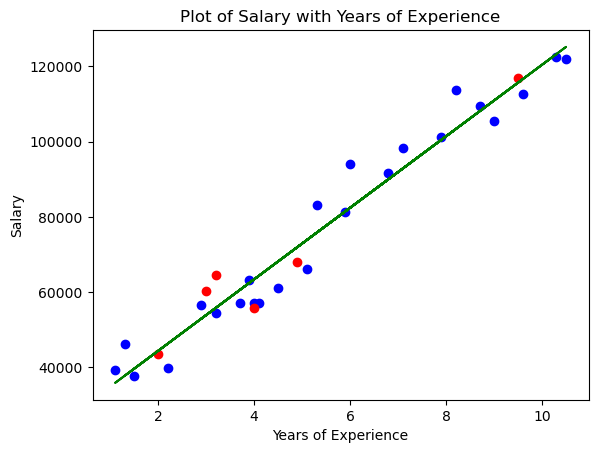

In [28]:
plt.title("Plot of Salary with Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(x_train,y_train,color='blue')
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regression.predict(x_train), color='green')
